In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# Generate a sample dataset
data = {'values': [2, 5, 10, 20, 50]}
df = pd.DataFrame(data)

# Column Transformations

In [3]:
# Apply power transformation (x^2)
power_transformed = np.power(df['values'], 2)
print("Power Transformation (x^2):")
print(power_transformed)

Power Transformation (x^2):
0       4
1      25
2     100
3     400
4    2500
Name: values, dtype: int64


In [4]:
# Apply exponential function (e^x)
exponential_transformed = np.exp(df['values'])
print("\nExponential Transformation (e^x):")
print(exponential_transformed)


Exponential Transformation (e^x):
0    7.389056e+00
1    1.484132e+02
2    2.202647e+04
3    4.851652e+08
4    5.184706e+21
Name: values, dtype: float64


In [5]:
# Apply logarithmic transformation (log base 10)
log_transformed = np.log10(df['values'])
print("\nLogarithmic Transformation (log base 10):")
print(log_transformed)


Logarithmic Transformation (log base 10):
0    0.30103
1    0.69897
2    1.00000
3    1.30103
4    1.69897
Name: values, dtype: float64


In [6]:
# Apply reciprocal transformation (1/x)
reciprocal_transformed = 1 / df['values']
print("\nReciprocal Transformation (1/x):")
print(reciprocal_transformed)


Reciprocal Transformation (1/x):
0    0.50
1    0.20
2    0.10
3    0.05
4    0.02
Name: values, dtype: float64


In [7]:
# Apply square root transformation (sqrt(x))
sqrt_transformed = np.sqrt(df['values'])
print("\nSquare Root Transformation (sqrt(x)):")
print(sqrt_transformed)


Square Root Transformation (sqrt(x)):
0    1.414214
1    2.236068
2    3.162278
3    4.472136
4    7.071068
Name: values, dtype: float64


Box-Cox Transformation: Applies the Box-Cox transformation, which optimizes the transformation parameter to make the data as close to a normal distribution as possible.
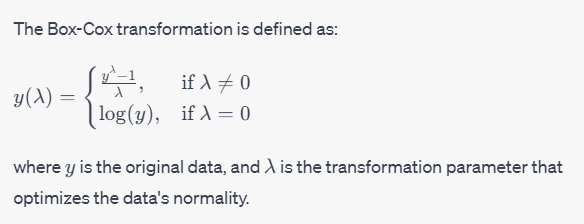

When to Apply Box-Cox Transformation:

Assumption of Normality: The Box-Cox transformation is particularly useful when you suspect that your data follows a multiplicative (power-law) distribution or when it has a positively skewed distribution.

Positive Values Only: The Box-Cox transformation requires that the data values be strictly positive, as it involves taking the logarithm and exponentiation.

Statistical Analysis: The Box-Cox transformation is commonly used in situations where the assumption of normality is required, such as in linear regression and ANOVA.


In [8]:
# Apply Box-Cox transformation
boxcox_transformed, _ = stats.boxcox(df['values'])
print("\nBox-Cox Transformation:")
print(boxcox_transformed)


Box-Cox Transformation:
[0.69314718 1.60943791 2.30258509 2.99573228 3.91202301]


Yeo-Johnson Transformation:

The Yeo-Johnson transformation is an extension of the Box-Cox transformation that can handle both positive and negative values. It is defined as:
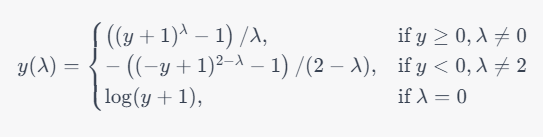

When to Apply Yeo-Johnson Transformation:

Positive and Negative Values: Yeo-Johnson can handle both positive and negative values, making it suitable for datasets that include zero or negative values.

General Distribution: The Yeo-Johnson transformation is more flexible than Box-Cox in handling a wider range of distributions. 

Multiple Parameter Optimization: Yeo-Johnson optimizes two parameters to provide a more accurate fit to the data distribution.

In [9]:
# Apply Yeo-Johnson transformation
yeo_johnson_transformed, _ = stats.yeojohnson(df['values'])
print("\nYeo-Johnson Transformation:")
print(yeo_johnson_transformed)


Yeo-Johnson Transformation:
[1.04623451 1.65523431 2.15763119 2.66432531 3.31348363]


# Binning

Binning is a data preprocessing technique used to group continuous numerical data into discrete intervals, called "bins" or "buckets." It's particularly useful when you want to simplify the data, reduce noise, or create a categorical representation of continuous values.
Suppose you have a dataset of ages and you want to categorize them into age groups (bins) such as "Child," "Teenager," "Adult," and "Senior Citizen." You can define the age boundaries for each bin and categorize each individual's age accordingly.

In [10]:
import pandas as pd

# Sample data
data = {'ages': [25, 32, 40, 18, 60, 50, 22, 38, 45, 70]}
df = pd.DataFrame(data)

# Define bin boundaries
bin_boundaries = [0, 18, 35, 60, 100]

# Create age groups using pd.cut
age_groups = pd.cut(df['ages'], bins=bin_boundaries, labels=['Child', 'Young Adult', 'Adult', 'Senior'])

# Add age groups to the DataFrame
df['age_group'] = age_groups

print(df)


   ages    age_group
0    25  Young Adult
1    32  Young Adult
2    40        Adult
3    18        Child
4    60        Adult
5    50        Adult
6    22  Young Adult
7    38        Adult
8    45        Adult
9    70       Senior


# Binarisation
Binarization, also known as thresholding, is a technique that converts numerical data into binary values (0 or 1) based on a specified threshold. It's often used when you're interested in categorizing data into two classes or when you want to create binary features.
Consider a dataset of temperatures and you want to create a binary feature indicating whether each temperature is "hot" (above a certain threshold) or "not hot" (below the threshold). You would set a threshold temperature and assign 1 to temperatures above the threshold and 0 to temperatures below it.

In [12]:
# Sample data
data = np.array([20, 25, 30, 15, 10, 40, 35, 5, 28])

# Define threshold for binarization
threshold = 25

# Binarize the data using numpy
binarized_data = (data > threshold).astype(int)

print(binarized_data)


[0 0 1 0 0 1 1 0 1]


# Discretization
It is a data preprocessing technique that involves converting continuous numerical data into a discrete representation by grouping values into intervals or categories. The goal of discretization is to simplify the data, reduce noise, and make it easier to analyze or use in certain algorithms that require categorical data.

Discretization is particularly useful when working with algorithms that are designed to handle categorical data, or when you want to interpret the data in a more interpretable way. It's also helpful when you have limited data points or noisy data that can benefit from being grouped into meaningful categories.

There are two main types of discretization:

Equal-Width Discretization (Binning): In this approach, the range of values is divided into equal-width intervals, and data points are assigned to the corresponding interval. This is useful when you want to create a fixed number of bins with equal intervals, regardless of the distribution of the data.

Equal-Frequency Discretization (Quantization): Here, the data is divided into intervals such that each interval contains roughly the same number of data points. This method is useful when you want to ensure that each category has a similar number of data points, regardless of the distribution of the data.



Consider a dataset of students' exam scores ranging from 0 to 100. You want to discretize these scores into categories: "Fail," "Pass," "Good," and "Excellent."

- Using Equal-Width Discretization: You might define intervals like [0-25), [25-50), [50-75), [75-100], and assign scores to the corresponding interval.

- Using Equal-Frequency Discretization: You would group scores such that each category (Fail, Pass, Good, Excellent) has approximately the same number of students.

Keep in mind that discretization involves a trade-off between simplifying data and potentially losing information, especially if the intervals are too broad. The choice of discretization method and the number of intervals should be based on the nature of the data and the requirements of your analysis or modeling task.

In [15]:

# Sample data
data = {'scores': [62, 85, 45, 92, 32, 78, 70, 55, 88, 95]}
df = pd.DataFrame(data)

# Define bin boundaries for equal-width discretization
equal_width_bins = [0, 25, 50, 75, 100]
equal_width_labels = ['Fail', 'Pass', 'Good', 'Excellent']

# Perform equal-width discretization
df['equal_width_category'] = pd.cut(df['scores'], bins=equal_width_bins, labels=equal_width_labels)

# Define number of bins for equal-frequency discretization
num_bins = 4

# Perform equal-frequency discretization
equal_freq_labels = ['Category{}'.format(i+1) for i in range(num_bins)]
df['equal_freq_category'] = pd.qcut(df['scores'], q=num_bins, labels=equal_freq_labels)

print(df)


   scores equal_width_category equal_freq_category
0      62                 Good           Category2
1      85            Excellent           Category3
2      45                 Pass           Category1
3      92            Excellent           Category4
4      32                 Pass           Category1
5      78            Excellent           Category3
6      70                 Good           Category2
7      55                 Good           Category1
8      88            Excellent           Category4
9      95            Excellent           Category4


Quantile binning is a discretization technique that divides continuous numerical data into bins based on quantiles. Quantiles are points in a data distribution that divide the data into equal portions. For example, the median is the 50th percentile, which divides the data into two equal parts.

In [16]:
from sklearn.preprocessing import KBinsDiscretizer

# Sample data
data = {'scores': [62, 85, 45, 92, 32, 78, 70, 55, 88, 95]}
df = pd.DataFrame(data)

# Define number of quantiles/bins
num_bins = 4

# Perform quantile binning
quantile_binner = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
quantile_binned = quantile_binner.fit_transform(df[['scores']])

# Add quantile bin labels to the DataFrame
df['quantile_bin'] = quantile_binned.flatten()

print(df)

   scores  quantile_bin
0      62           1.0
1      85           2.0
2      45           0.0
3      92           3.0
4      32           0.0
5      78           2.0
6      70           1.0
7      55           0.0
8      88           3.0
9      95           3.0


In [17]:

from sklearn.cluster import KMeans

# Sample data
data = {'scores': [62, 85, 45, 92, 32, 78, 70, 55, 88, 95]}
df = pd.DataFrame(data)

# Define number of clusters/bins
num_bins = 4

# Fit K-Means clustering
kmeans = KMeans(n_clusters=num_bins)
df['kmeans_bin'] = kmeans.fit_predict(df[['scores']])

print(df)


   scores  kmeans_bin
0      62           1
1      85           0
2      45           1
3      92           0
4      32           2
5      78           3
6      70           3
7      55           1
8      88           0
9      95           0


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
